In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
file_path = 'abc.xlsx' 
data = pd.read_excel(file_path)

In [3]:
data = data.drop(['customer_id', 'phone_no'], axis=1)

In [4]:
# Encode categorical columns (e.g., 'gender', 'multi_screen', 'mail_subscribed')
label_encoders = {}
for column in ['gender', 'multi_screen', 'mail_subscribed']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [5]:
# Define features (X) and target variable (y)
X = data.drop('churn', axis=1)
y = data['churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [7]:
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       353
           1       0.47      0.57      0.52        47

    accuracy                           0.88       400
   macro avg       0.71      0.74      0.72       400
weighted avg       0.89      0.88      0.88       400



In [9]:
# Optional: Visualize the Decision Tree
from sklearn.tree import export_text
print("\nDecision Tree Structure:")
print(export_text(clf, feature_names=X.columns.tolist()))


Decision Tree Structure:
|--- maximum_daily_mins <= 44.69
|   |--- customer_support_calls <= 3.50
|   |   |--- multi_screen <= 0.50
|   |   |   |--- maximum_daily_mins <= 38.18
|   |   |   |   |--- age <= 22.50
|   |   |   |   |   |--- weekly_mins_watched <= 315.68
|   |   |   |   |   |   |--- no_of_days_subscribed <= 177.00
|   |   |   |   |   |   |   |--- no_of_days_subscribed <= 94.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- no_of_days_subscribed >  94.00
|   |   |   |   |   |   |   |   |--- weekly_max_night_mins <= 80.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- weekly_max_night_mins >  80.50
|   |   |   |   |   |   |   |   |   |--- no_of_days_subscribed <= 97.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- no_of_days_subscribed >  97.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- no_of_days_subscribed >  177.00

In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[323  30]
 [ 20  27]]


In [11]:
# Calculate evaluation metrics from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = (tn + tp) / (tn + fp + fn + tp)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Alternatively, use scikit-learn's built-in functions for metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the calculated metrics
print("\nMetrics Calculated from Confusion Matrix:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Metrics Calculated from Confusion Matrix:
Accuracy: 0.88
Precision: 0.47
Recall: 0.57
F1 Score: 0.52


In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


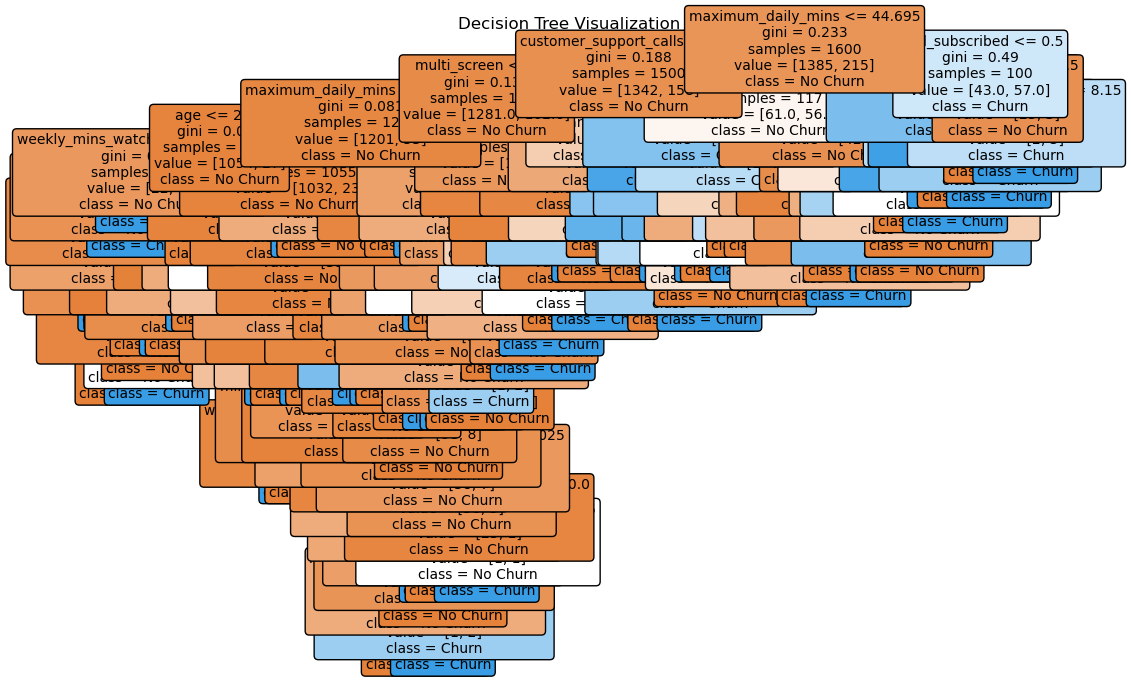

In [35]:


# Visualize the Decision Tree
plt.figure(figsize=(12, 8))  # Set the figure size
plot_tree(clf, 
          feature_names=X.columns,  # Set feature names to label the nodes
          class_names=["No Churn", "Churn"],  # Set class names to label the leaves
          filled=True,  # Color the nodes to indicate class distribution
          rounded=True,  # Rounded corners for the nodes
          fontsize=10)  # Set font size for readability
plt.title("Decision Tree Visualization")
plt.show()

In [37]:
from imblearn.metrics import geometric_mean_score

# Calculate Geometric Mean
g_mean = geometric_mean_score(y_test, y_pred, average='weighted')

# Print the Geometric Mean
print(f"Geometric Mean (G-Mean): {g_mean:.2f}")


Geometric Mean (G-Mean): 0.73
